In [5]:
using DrWatson
@quickactivate
using Revise
using CairoMakie
includet("../src/main.jl")

In [13]:
df = get_results();
ldf, rdf = split_results(df);

┌ Info: Scanning folder /Users/zijin/projects/ion_scattering_by_SWD/data/simulations for result files.
└ @ DrWatson /Users/zijin/.julia/packages/DrWatson/8XYbJ/src/result_collection.jl:117
┌ Info: Added 288 entries.
└ @ DrWatson /Users/zijin/.julia/packages/DrWatson/8XYbJ/src/result_collection.jl:193


In [14]:
θs = vals(df, :θ);
βs = vals(df, :β);
vs = vals(df, :v);

In [69]:
func = subset_v(100) ∘ subset_leave ∘ subset_β(βs[2:2:end])
func_t = subset_v(100) ∘ subset_trap ∘ subset_β(βs[2:2:end])

var"#62#64"{Int64}(100) ∘ subset_trap ∘ var"#66#68"{Vector{Float64}}([29.999999999999996, 59.99999999999999, 89.99999999999999])

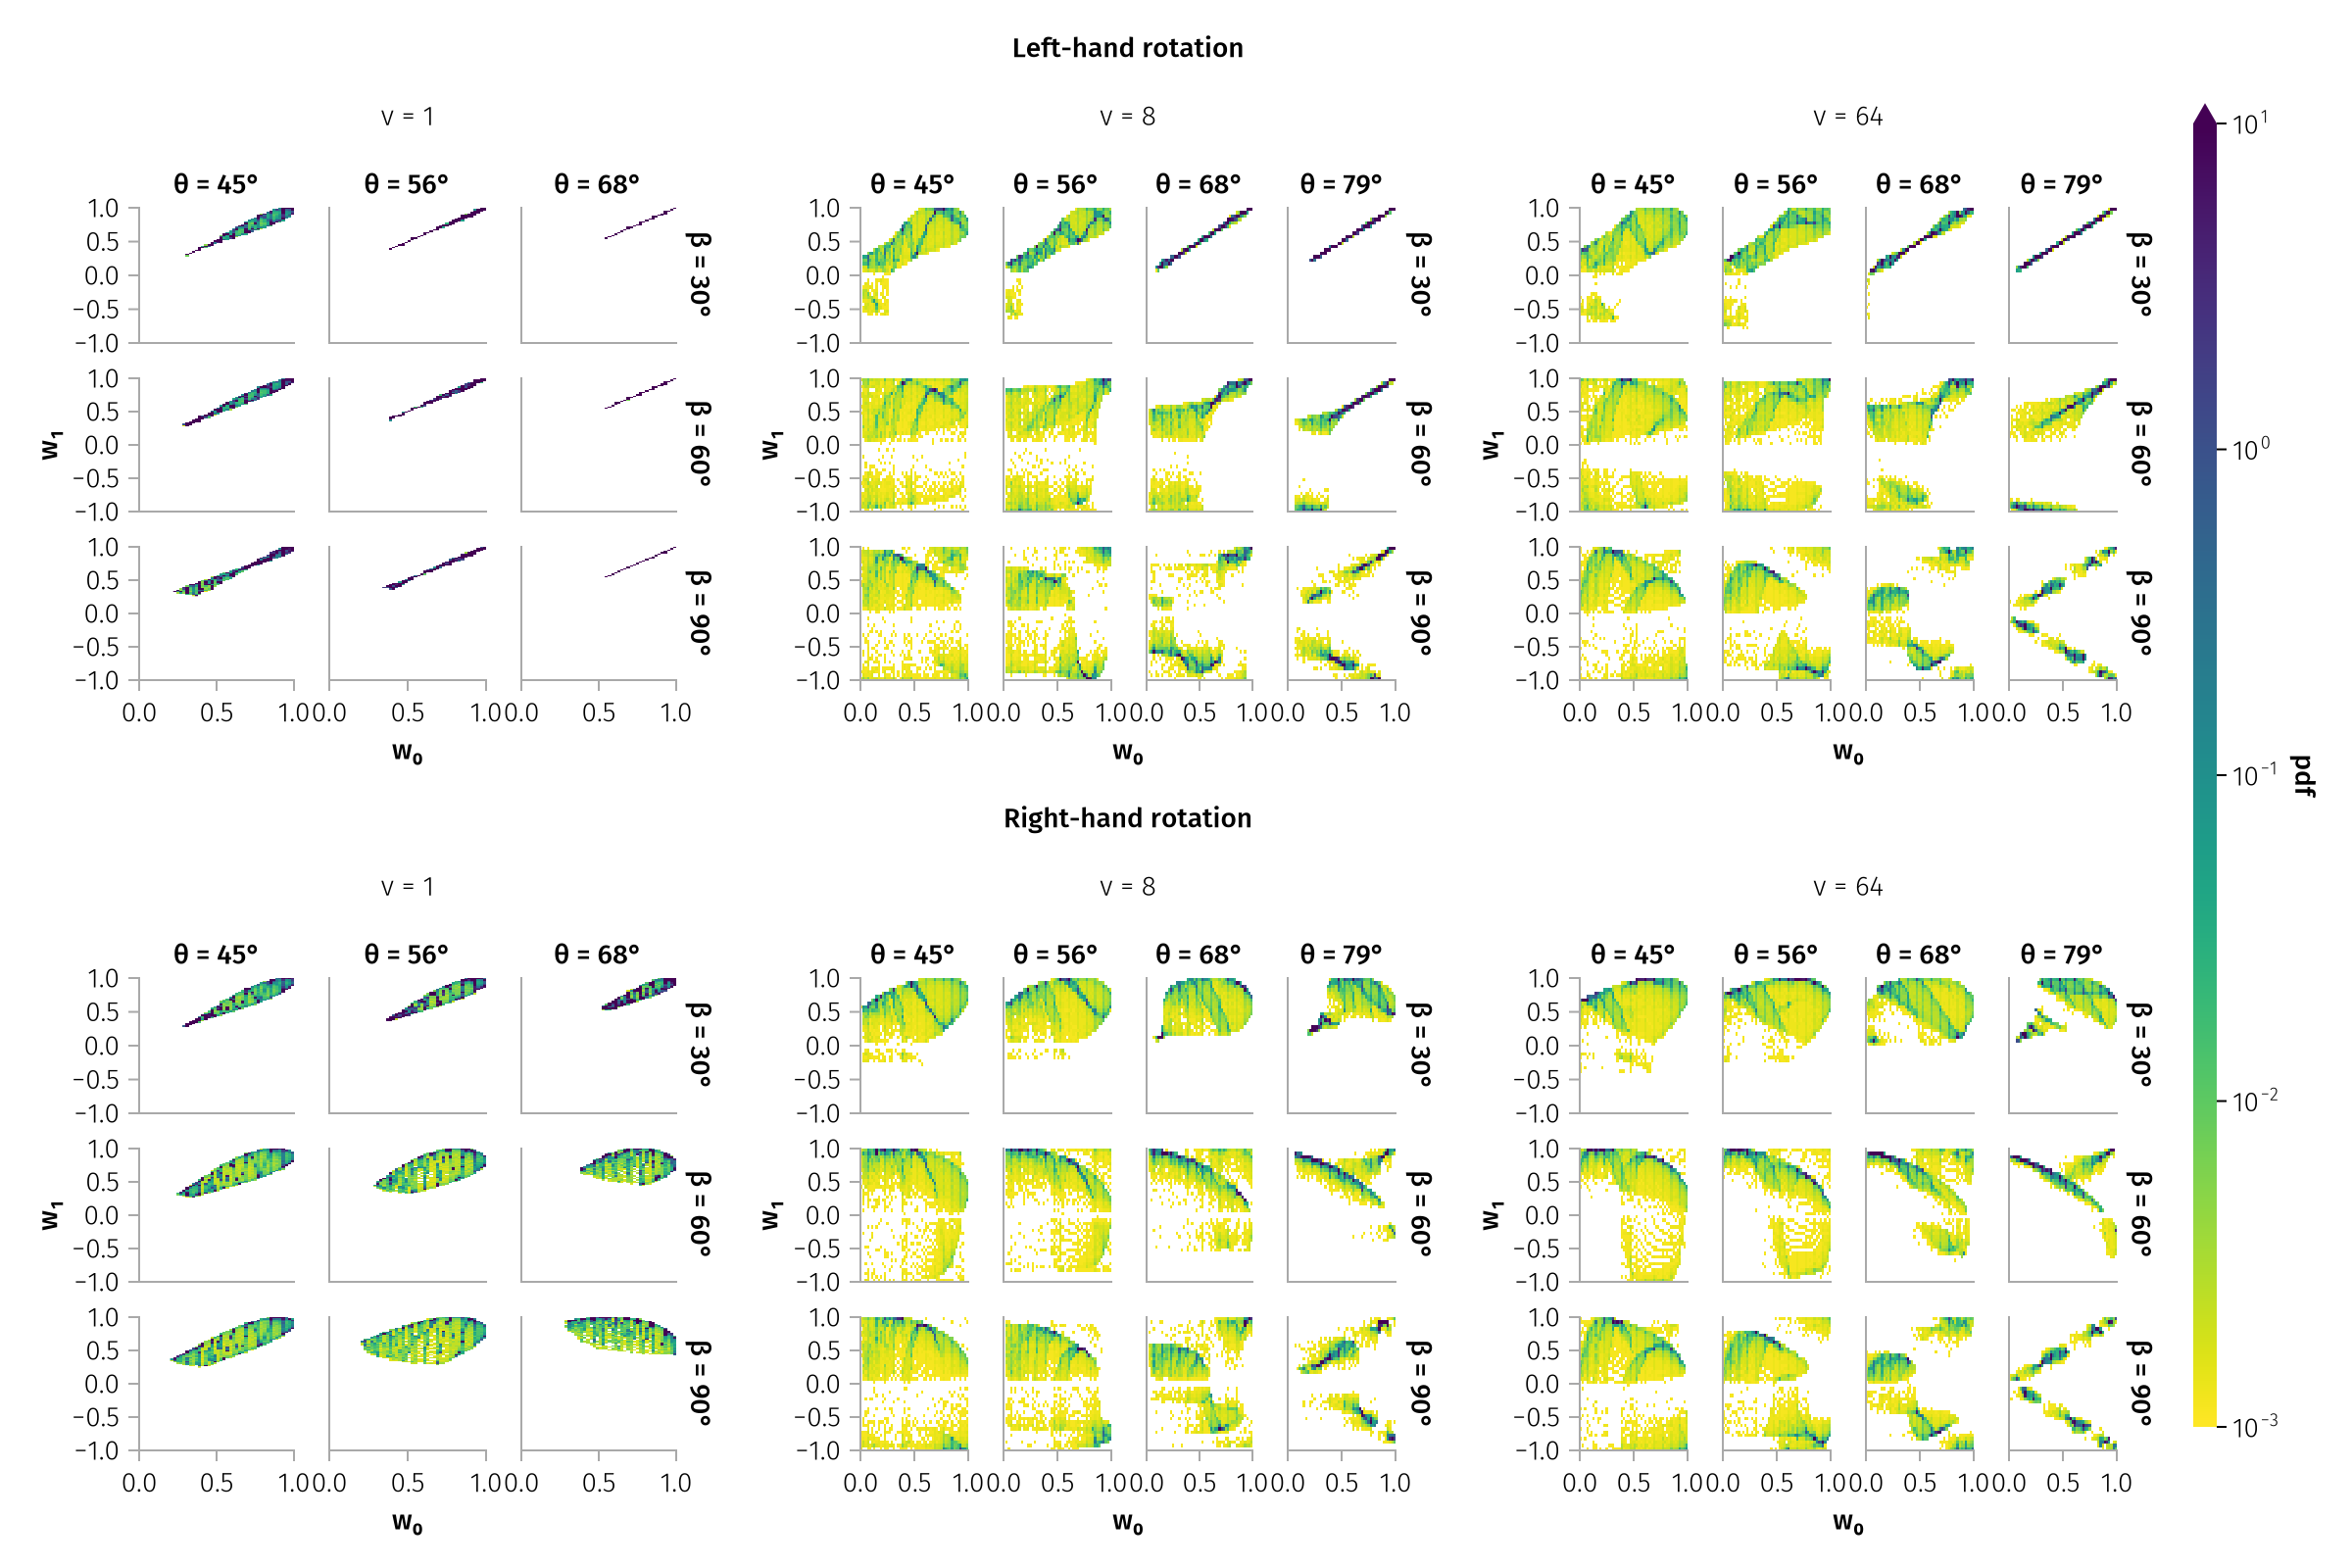

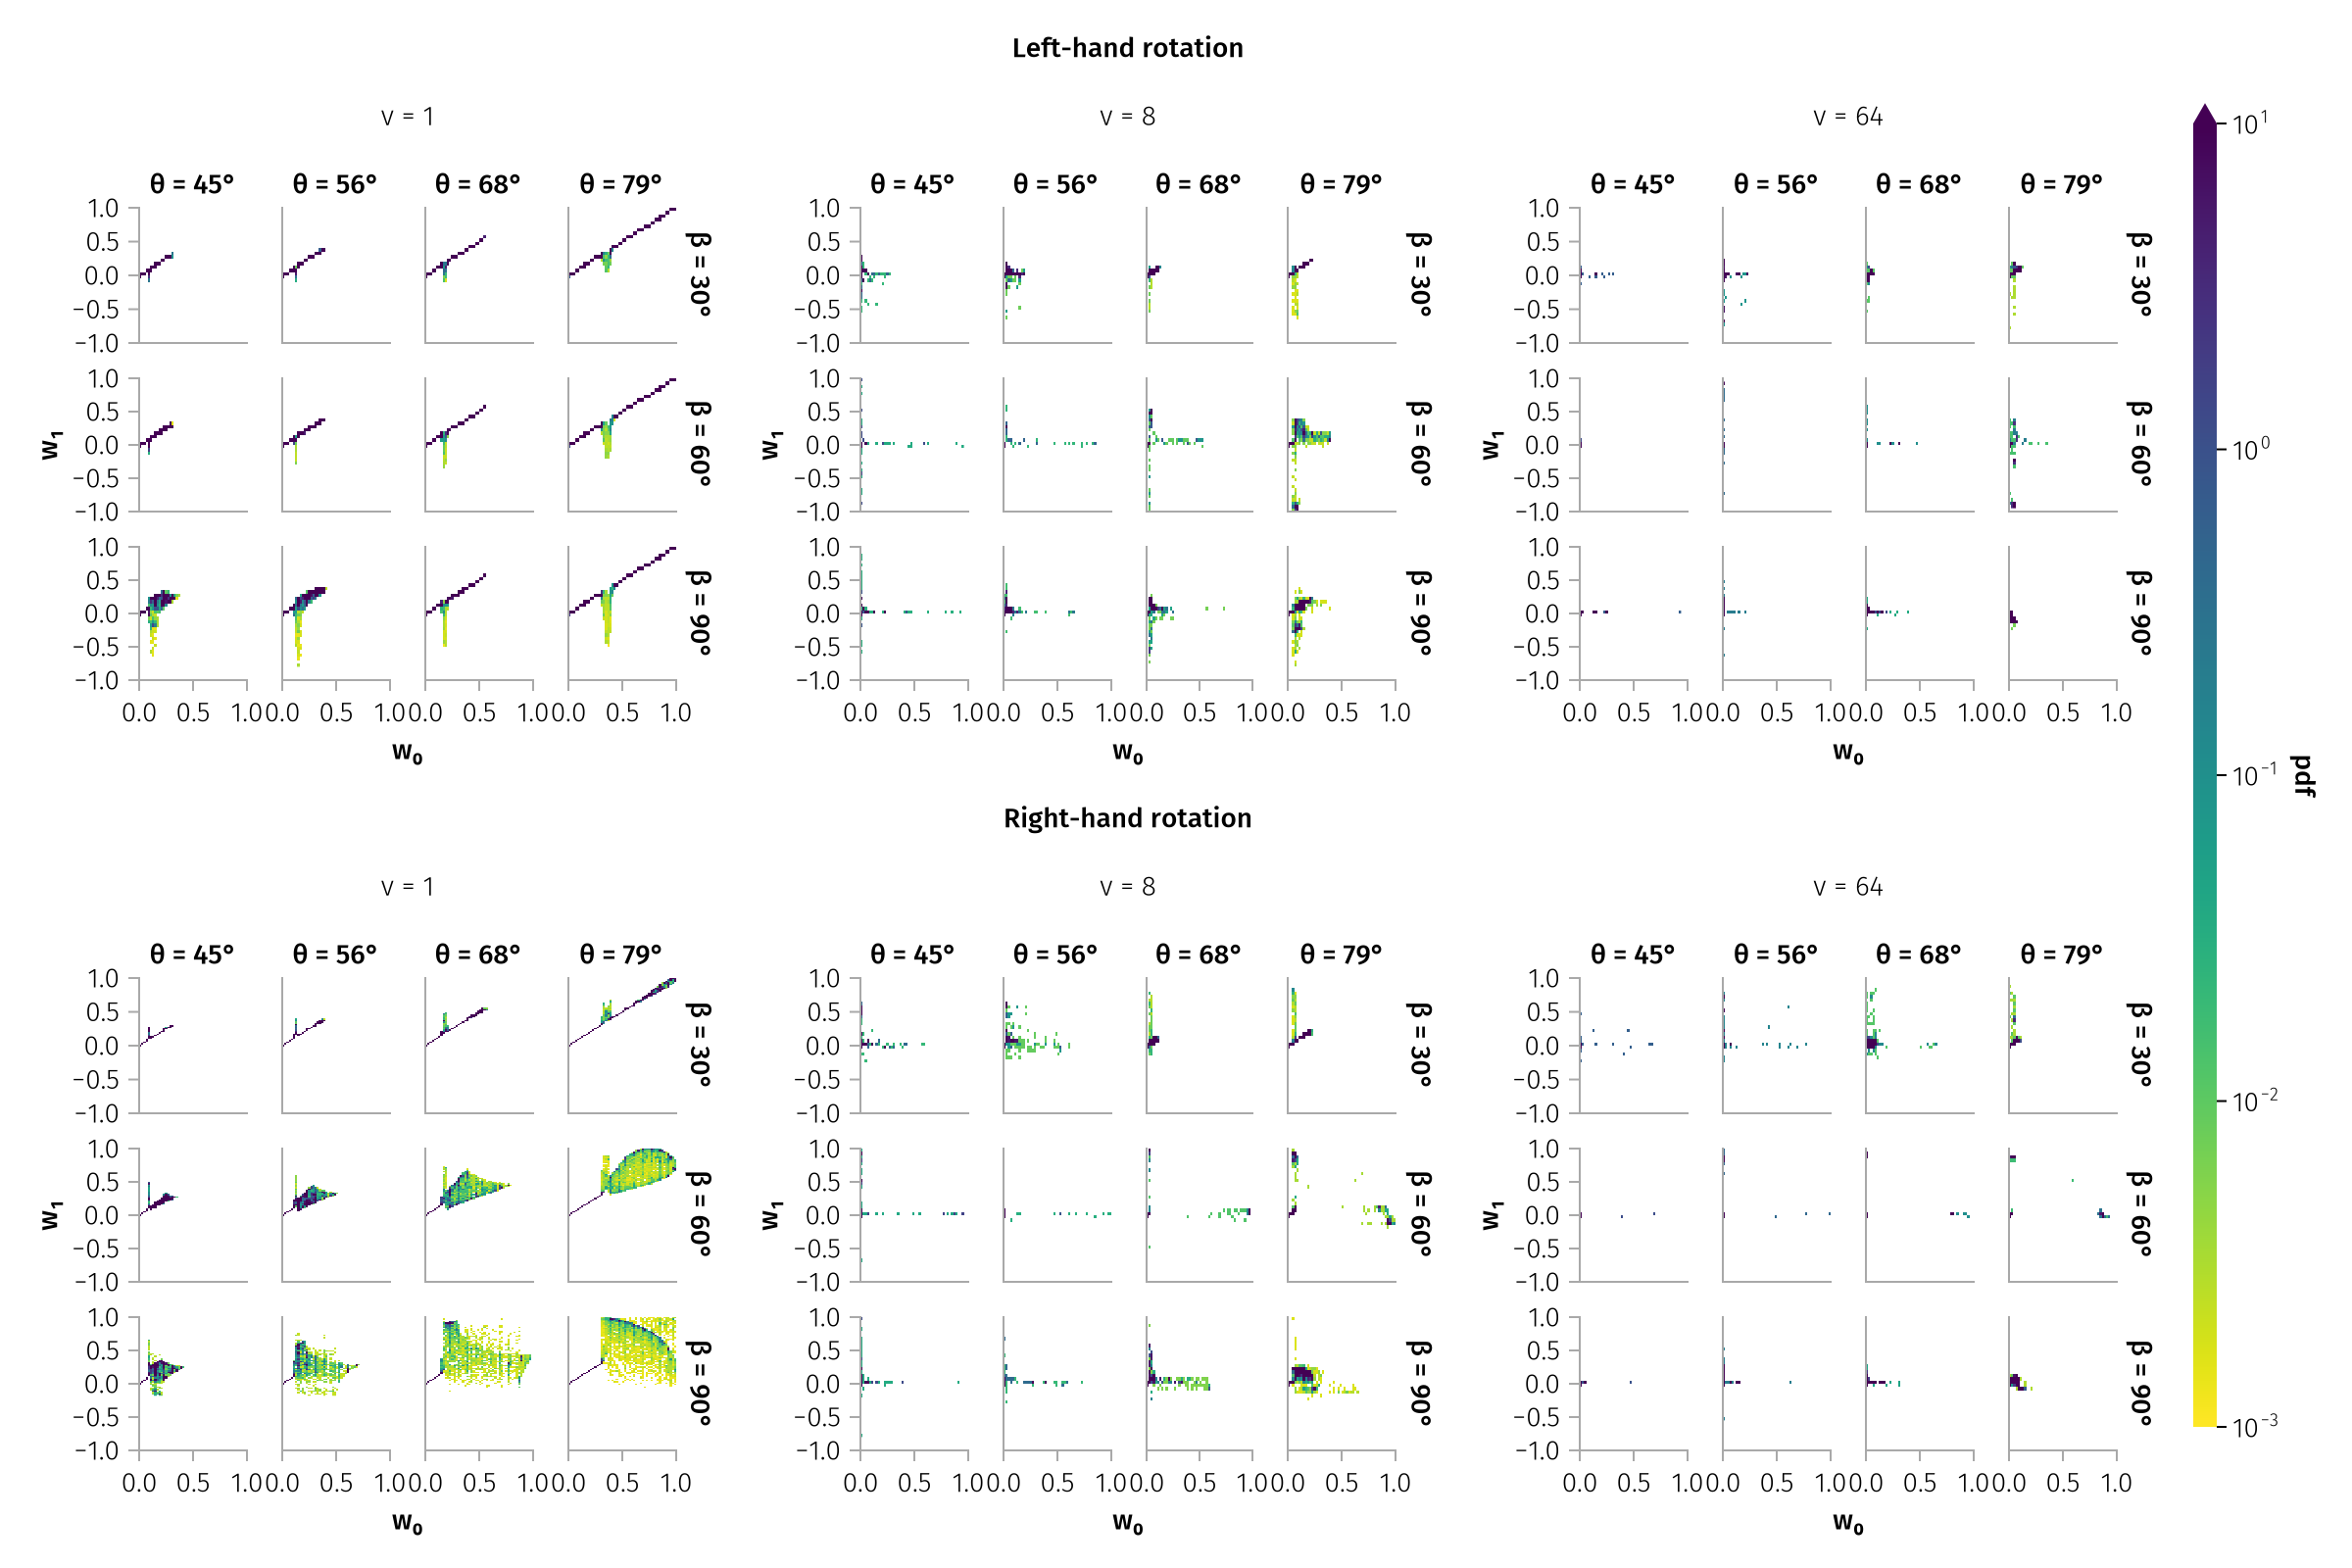

CairoMakie.Screen{IMAGE}


In [71]:
pa_pair_plot(ldf, rdf; func) |> display
pa_pair_plot(ldf, rdf; func=func_t) |> display

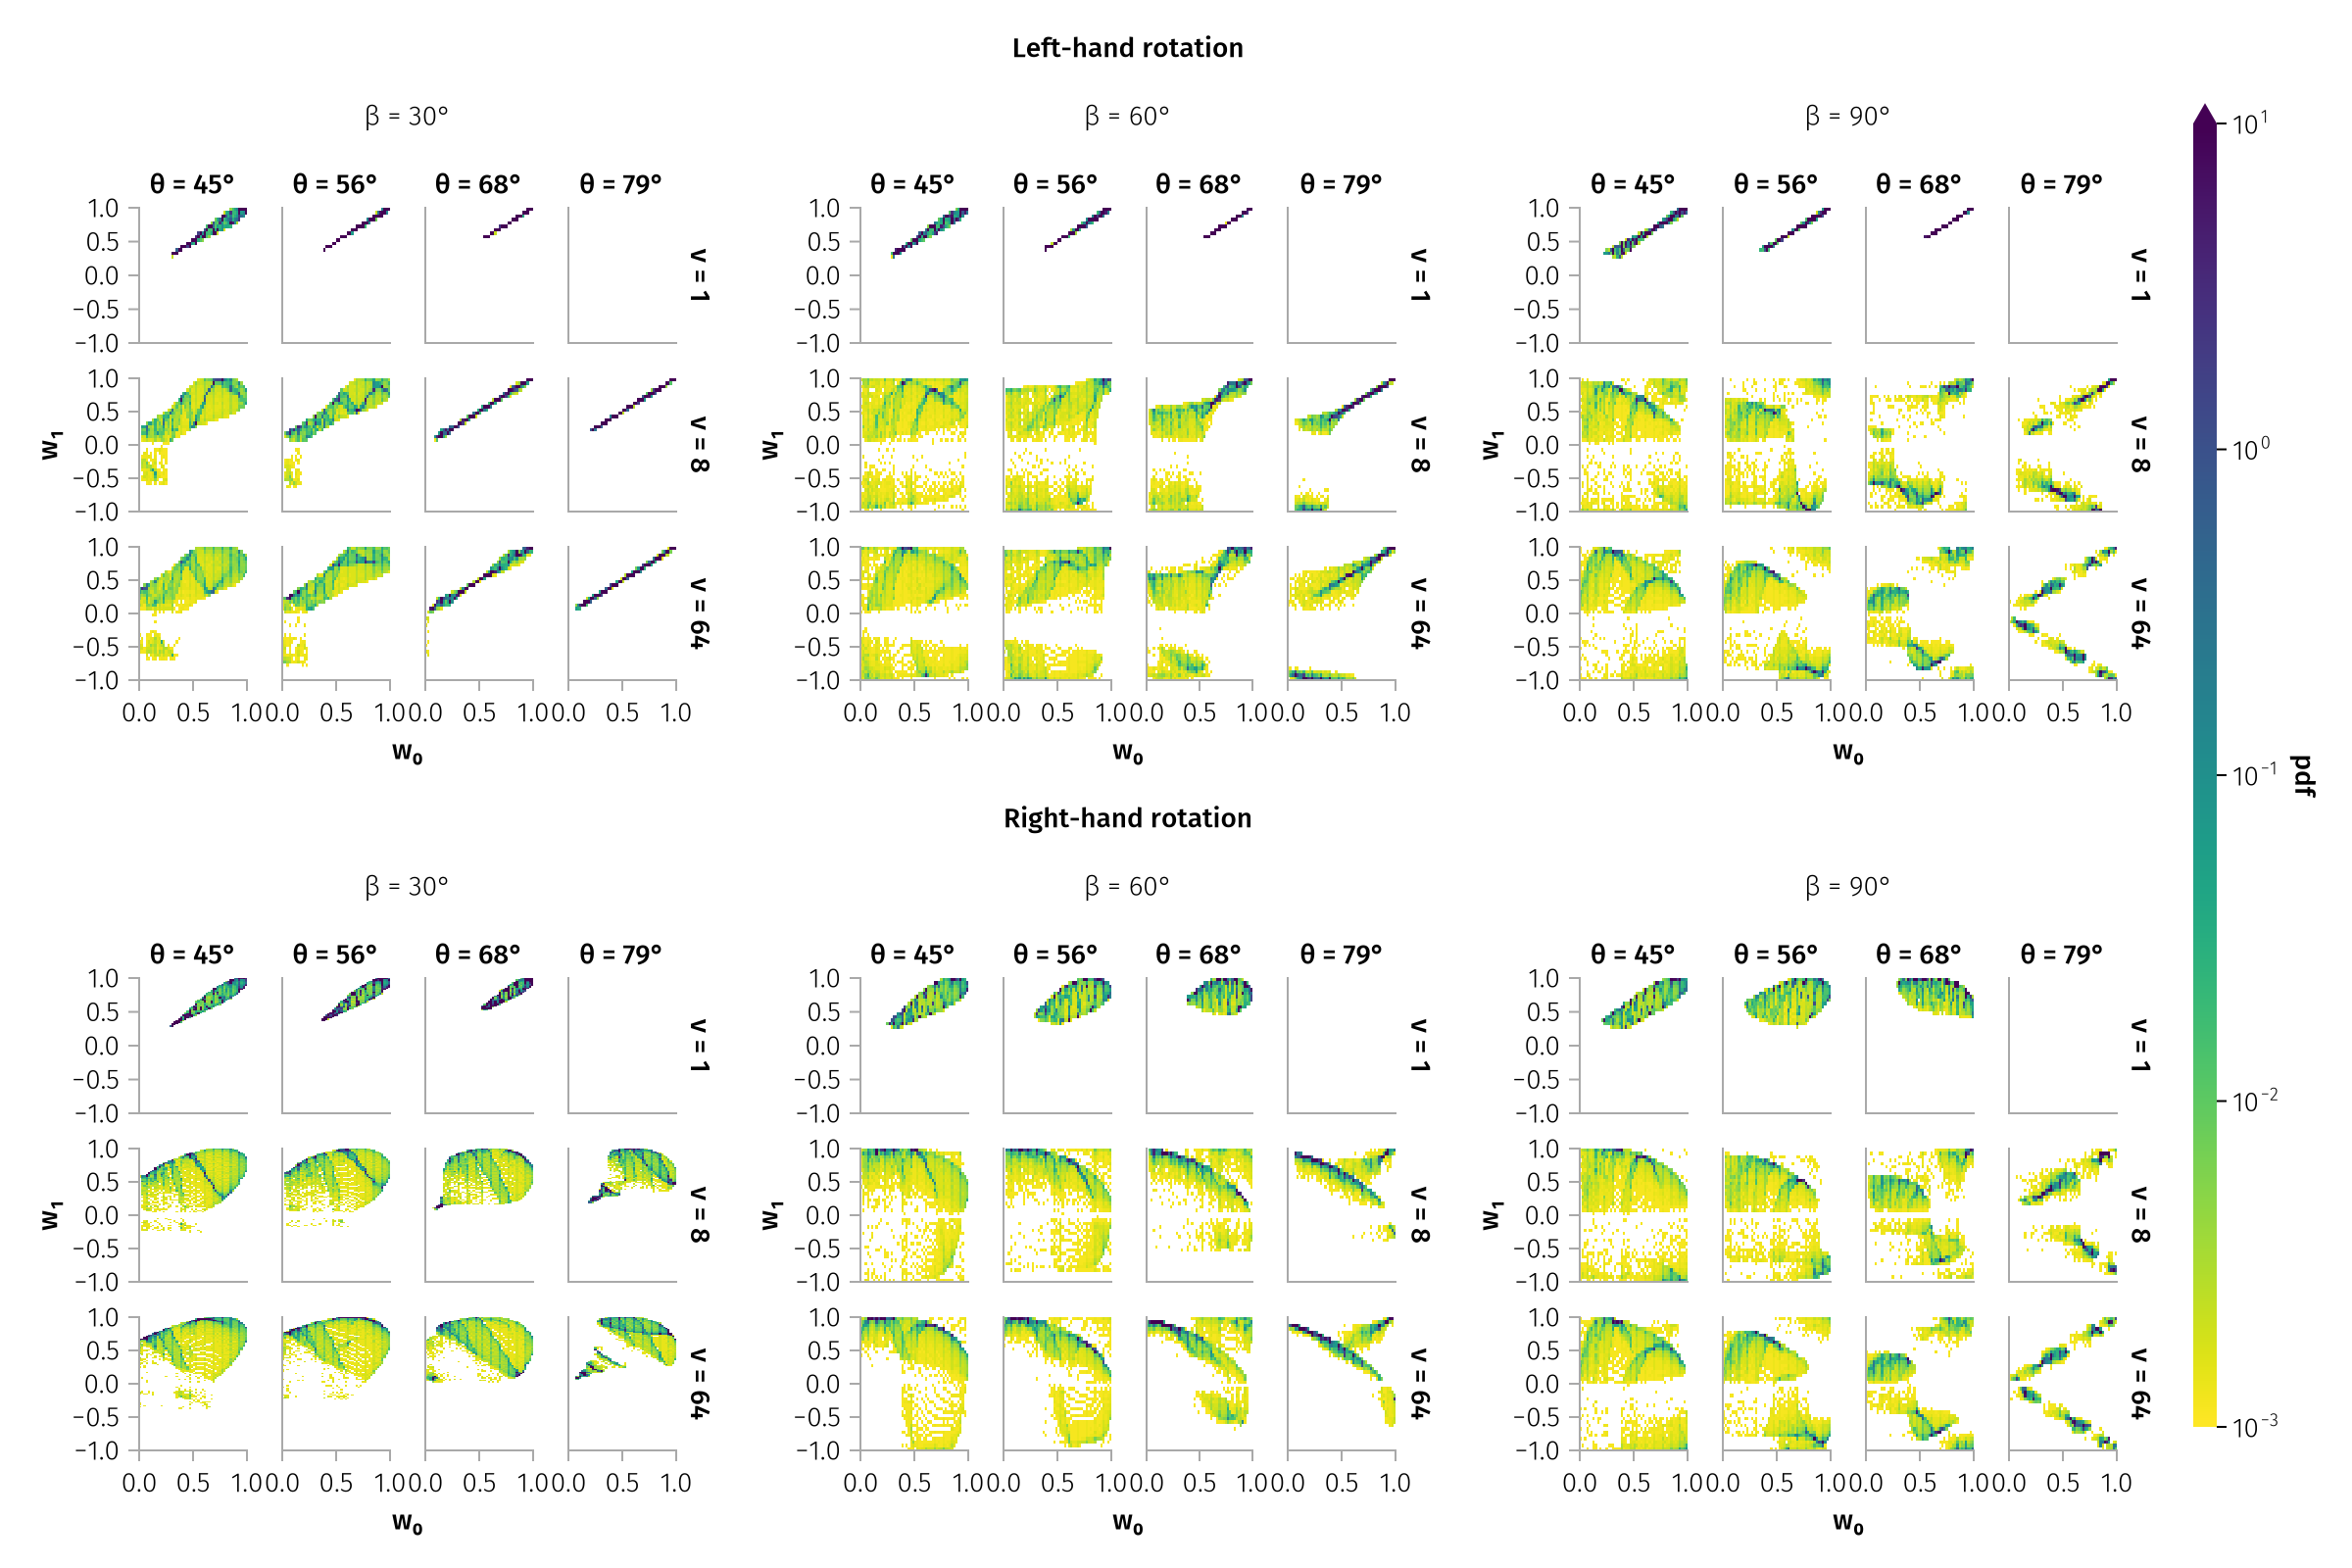

In [72]:
pa_pair_plot(ldf, rdf; s = :β, func)

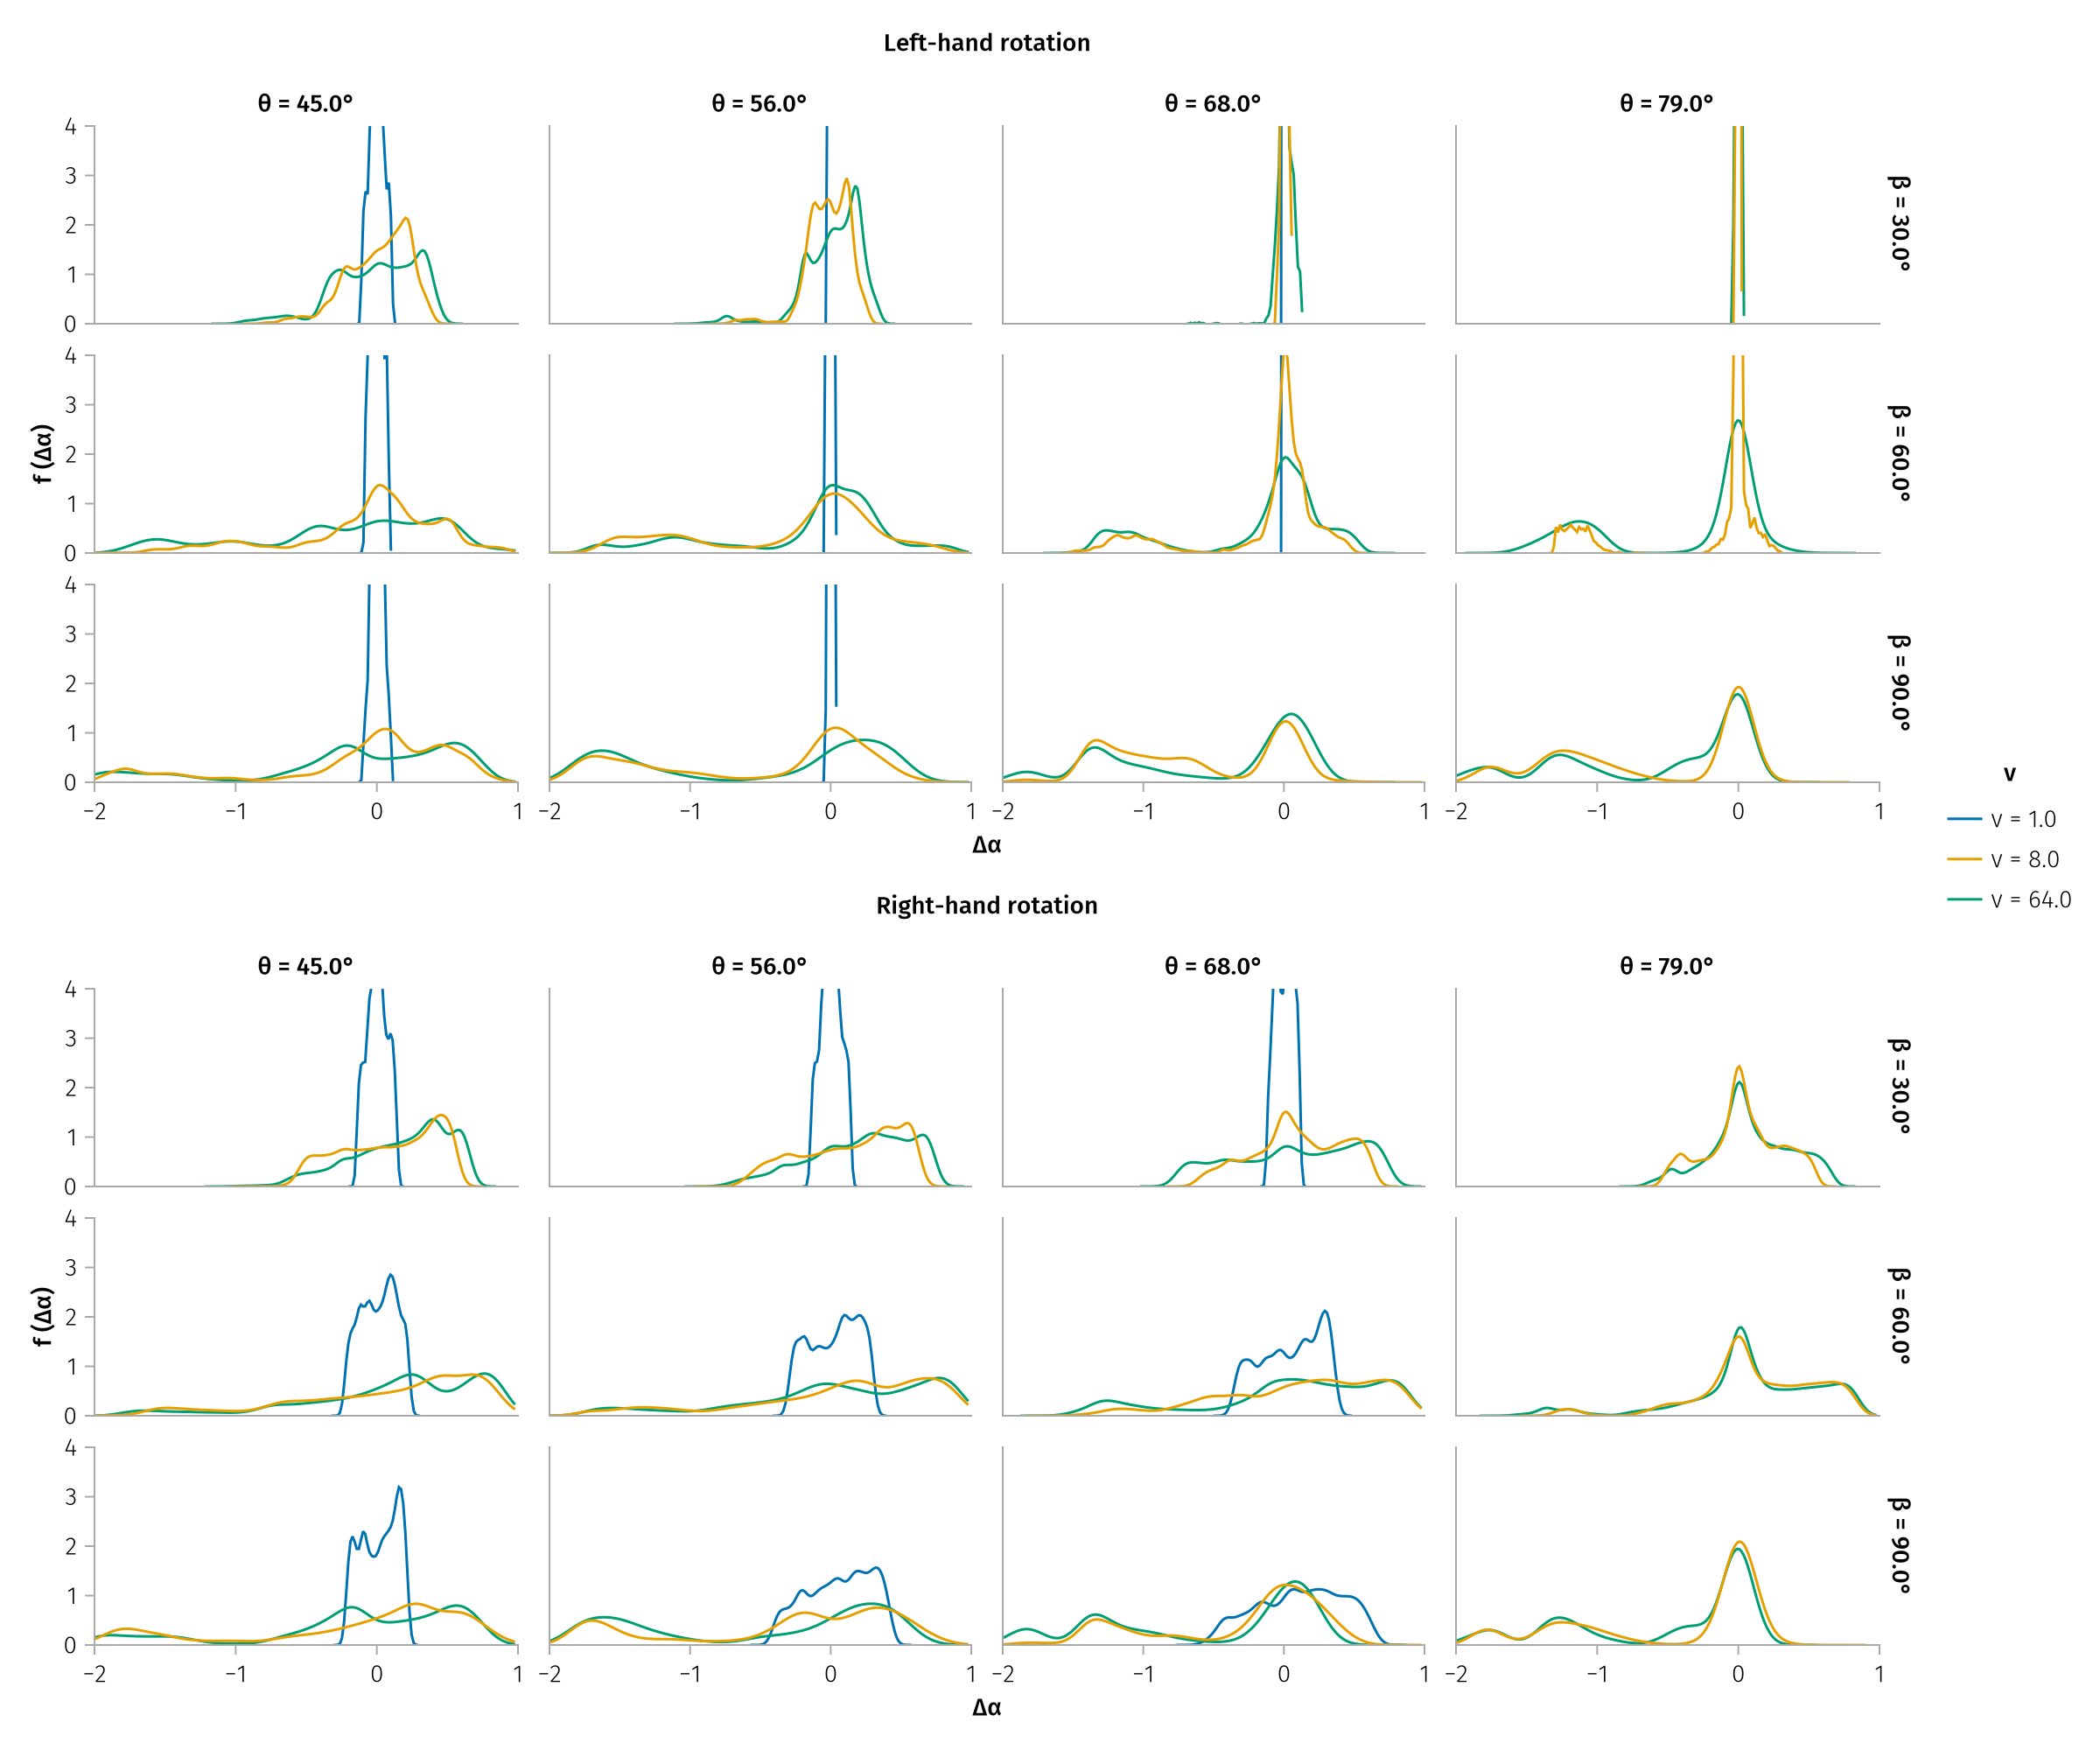

In [128]:
fig = Figure(; size=(1200, 1000,))
gridsl = pa_diff_plot!(fig[1,1], func(ldf))
gridsr = pa_diff_plot!(fig[3,1], func(rdf))
sign_label(fig)
legend!(fig[:,end+1], gridsl)
fig

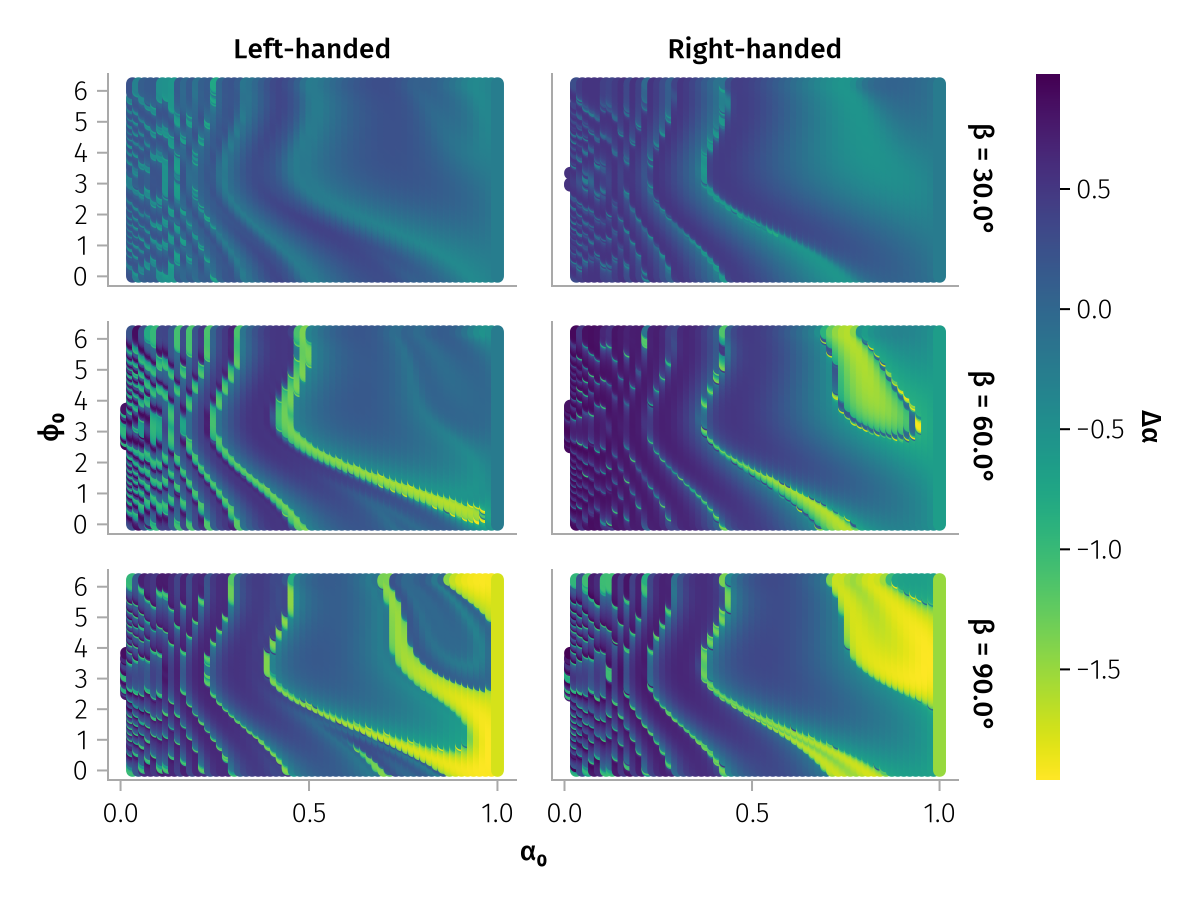

In [132]:
tdf = @subset(func(df), :v .== 8, :θ .== 45);
l = data(tdf) * mapping(col=sign_map,row=β_map)
w1_map_plot(l; color=Δα)

In [ ]:
# Create a layer with faceting for α, β, and v
begin
    using GLMakie
    GLMakie.activate!()
    fg = pa_pair_plot(layer; figure = figure)
end